In [2]:
import pandas as pd

In [4]:
mc = pd.read_excel('medals.xlsx')
mc

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


# Estimate of location

In [15]:
mc["Total"].mean()

11.612903225806452

In [18]:
import numpy as np
#weighted mean
np.average(mc["Total"], weights=mc["Gold"])

46.832352941176474

In [22]:
#trimmed mean: it will not be sensitive to outliers. will be robust.
from scipy.stats import trim_mean
trim_mean(mc["Gold"], 0.1)

1.96

### Median is alot more robust. great for heavily skewed values like income levels

In [23]:
mc["Total"].median()

4.0

In [26]:
def weighted_median(df, median_col, weight_col):
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weight_col].cumsum()
    cutoff = df_sorted[weight_col].sum() / 2.
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]
weighted_median(mc,"Total", "Gold")

40

In [28]:
q3 = np.percentile(mc['Total'], 75)
q3

11.0

In [30]:
mc.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


# Estimate of Variability (Dispersion Metrics)

### Without variablity we cannot correlate anything to anything else

### Variance

In [39]:
from statistics import variance
variance(mc['Gold'])

49.315100514259

### STD dev

In [40]:
from statistics import stdev
stdev(mc["Gold"])

7.022471111671376

### Mean absolute dev

In [48]:
from numpy import mean, absolute

mean(absolute(mc['Gold']-mean(mc['Gold'])))

4.0048560527228565

### Median absolute dev

In [50]:
from numpy import median, absolute
median(absolute(mc['Gold']-median(mc['Gold'])))

1.0

In [51]:
q3, q1 = np.percentile(mc['Gold'], [75,25])
iqr = q3 - q1
iqr

3.0

### Exploring the Data distribution

<AxesSubplot:>

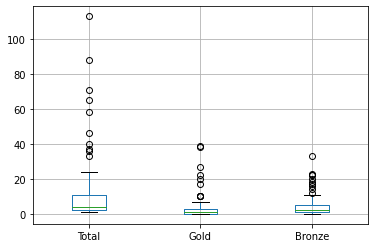

In [56]:
mc.boxplot(column=['Total',"Gold", "Bronze"], by=None, ax=None)

(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <BarContainer object of 30 artists>)

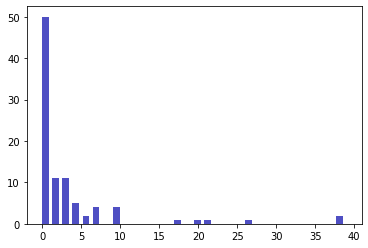

In [65]:
import matplotlib.pyplot as plt
plt.hist(x=mc["Gold"], bins='auto', color='#0504aa', alpha=0.7, width=.85)

<AxesSubplot:ylabel='Density'>

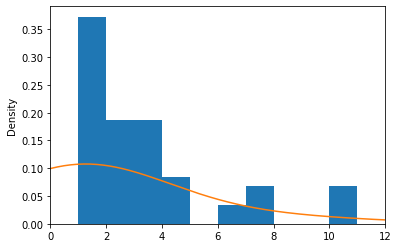

In [66]:
ax = mc['Gold'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
mc['Gold'].plot.density(ax=ax)

### Exploring Binary and Catagorical Data

In [68]:
mc["Gold"].mode()

0    0
dtype: int64

Text(0, 0.5, 'Country')

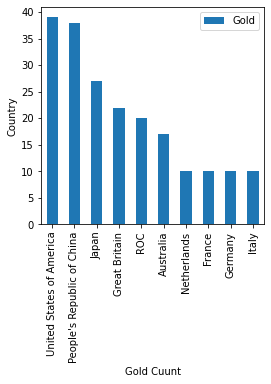

In [71]:
ax = mc.iloc[:10,:].plot.bar(x="Team/NOC", y='Gold', figsize=(4,4), legend = "False")
ax.set_xlabel('Gold Cuunt')
ax.set_ylabel('Country')


([<matplotlib.patches.Wedge at 0x266ee7b75b0>,
 [Text(-0.543674117111456, 0.9562522964066957, 'United States of America'),
  Text(-1.0993960437048385, 0.03644638646216122, "People's Republic of China"),
  Text(-0.7435970386565678, -0.8105945004138525, 'Japan'),
  Text(-0.1019222002615756, -1.0952679421465048, 'Great Britain'),
  Text(0.4922307915600052, -0.9837219362402218, 'ROC'),
  Text(0.8975687815645782, -0.6359011576972311, 'Australia'),
  Text(1.06345606304121, -0.28117823881106163, 'Netherlands'),
  Text(1.099975839130746, 0.007290632936260442, 'France'),
  Text(1.0596354997977235, 0.2952500763224776, 'Germany'),
  Text(0.9452538007156959, 0.5625791075329154, 'Italy'),
  Text(0.7956498548690093, 0.7595665266761856, 'Canada'),
  Text(0.641836040735363, 0.8933344820464246, 'Brazil'),
  Text(0.46598096414084994, 0.996424478351653, 'New Zealand'),
  Text(0.27412365632132074, 1.0652963066889092, 'Cuba'),
  Text(0.08739507036501419, 1.0965227319467181, 'Hungary')],
 [Text(-0.296549518

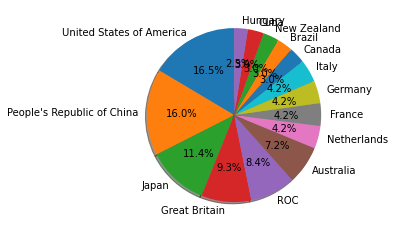

In [81]:
# Pie chart (NOT RECOMMENDED)

piedata = mc.iloc[:15,:]

plt.pie(piedata["Gold"], labels= piedata["Team/NOC"], autopct='%1.1f%%', shadow=True,startangle=90)

In [82]:
### Correlation

In [83]:
mc.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

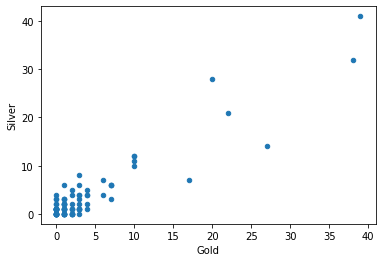

In [84]:
mc.plot.scatter(x="Gold", y="Silver")